# Introdução à Inteligência Artificial 2020/2021

## Aprendizagem automática (30/11 a 4/12)

## Conteúdos

* Conjuntos de dados (tipos de estruturas usadas)
* Árvores de decisão
    * O modelo
    * Visualização da árvore
    * Visualização das fronteiras de decisão
* k vizinhos mais próximos
* Conjuntos de treino e de teste
* Overfitting
* Cross-validation
* Árvores de decisão para atributos categóricos
* Árvores de decisão para atributos mistos


# Módulos de Python

Os módulos de Python que iremos usar neste guião são:

* **Scikit-learn:** Este é o módulo principal de aprendizagem automática. Mais detalhes sobre o scikit-learn <a href="https://scikit-learn.org/stable/">aqui</a>.
* **Matplotlib:** Este é o módulo principal para construir gráficos e visualização. Mais detalhes sobre o matplotlib <a href="https://matplotlib.org/">aqui</a>.
* **NumPy:** Este módulo é um dos fundamentais pois contém funcionalidades para arrays multidimensionais, funções matemáticas como por exemplo operações de matrizes da álgebra linear. Mais detalhes sobre o numpy <a href="https://numpy.org/">aqui</a>. Um **array numpy** é uma estrutura de dados fundamental no scikit-learn, sendo o `ndarray` a estrutura principal do numpy. Um `ndarray` significa que tem n dimensões e todos os elementos do array são do mesmo tipo.

Vamos experimentar criar um `ndarray` do numpy.

In [1]:
import numpy as np
x = np.array([[1,2,3], [4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [2]:
type(x)

numpy.ndarray

Acede-se aos elementos como se fosse uma matriz:

In [3]:
x[0]

array([1, 2, 3])

In [4]:
x[0][1]

2

#### Verificação das versões dos principais módulos de Python

Antes de começarmos a trabalhar o guião é necessário verificar as versões de alguns módulos, incluindo o scikit-learn, módulo principal para o guião. Assim, o scikit-learn (*sklearn*) terá de ser a **versão >= 0.21** para que se possa visualizar as árvores de decisão de uma forma simples. Além disso, o `matplotlib` terá de ser >= 1.5 e o `pandas` >= 1.0. Instruções de como instalar o scikit-learn podem ser encontradas <a href="https://scikit-learn.org/stable/install.html">aqui</a>.

Uma forma rápida de verificarem as versões dos módulos é executarem o seguinte código:

In [5]:
import sklearn
print(sklearn.show_versions())


System:
    python: 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:43:08) [MSC v.1926 32 bit (Intel)]
executable: c:\univ\3.1\iia\projeto\4\venv\scripts\python.exe
   machine: Windows-10-10.0.19041-SP0

Python dependencies:
          pip: 20.3.3
   setuptools: 51.0.0
      sklearn: 0.23.2
        numpy: 1.19.4
        scipy: 1.5.4
       Cython: None
       pandas: 1.1.5
   matplotlib: 3.3.3
       joblib: 1.0.0
threadpoolctl: 2.1.0

Built with OpenMP: True
None


In [6]:
from sklearn.datasets import load_iris # conjunto de dados
from sklearn.tree import DecisionTreeClassifier, plot_tree # árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.model_selection import train_test_split, cross_val_score # cross-validation
import numpy as np 
import matplotlib.pyplot as plt # gráficos
from utilsAA import * # módulo distribuido com o guião com funções auxiliares

## Introdução

Árvores de decisão conseguem lidar com atributos (*features*) categóricos e numéricos no mesmo conjunto de dados. Este é um dos pontos fortes, juntamente com a interpretabilidade do modelo. Alguns algoritmos de árvores de decisão, como C4.5, conseguem lidar com atributos categóricos nativamente, sendo transparente para o utilizador como os diferentes tipos de atributos são gerenciados pelo algoritmo, enquanto outros, como CART, requer transformação dos dados para lidar com atributos categóricos. **No Scikit-learn, por exemplo, todos os algoritmos de aprendizagem são implementados para receber como entrada valores numéricos, evitando o uso de certos tipos de atributos, como categóricos, sem transformações de dados.**

**Scikit-learn usa uma versão otimizada do algoritmo <a href="https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart">CART</a>** (*Classification and Regression Trees*), que permite classificação binária (duas classes) e multi-class (várias classes), e aprende árvores binárias. Para aprender árvores de decisão ou qualquer outro classificador de dados não-numéricos, o Scikit-learn requer transformações de atributos, também conhecidas como codificação. Assim, este guião irá abordar os seguintes tópicos em relação às árvores de decisão:
1. Árvores de decisão para atributos numéricos
2. Árvores de decisão para atributos categóricos
3. Árvores de decisão para atributos de vários tipos

Existem vários métodos para codificar os atributos categóricos. Iremos explorar três tipos de codificação: codificação binária, codificação one-hot, e codificação numérica.

## Um exemplo simples: Classificar espécies da flor Iris

Antes de entrarmos na explicação dos detalhes dos algoritmos, vamos explicar o conjunto de dados que vai de servir de exemplo para explicar alguns conceitos. 

*Exemplo adaptado do cap. 1 do livro: Müller, A. C., & Guido, S. (2016). "Introduction to machine learning with Python: a guide for data scientists." O'Reilly Media, Inc.*

Suponhamos que um botânico amador está interessado em distinguir as espécies de algumas flores de íris que encontrou. Ele recolhe algumas medidas associadas com cada íris: o comprimento e largura das pétalas e o comprimento e largura das sépalas, tudo medido em centímetros. Além disso, também tem as medidas de algumas íris que foram previamente identificadas por um botânico especialista como pertencente à espécie *setosa*, *versicolor* ou *virginica*. Para estas medidas, ele pode ter a certeza de quais espécies cada íris pertence. Vamos assumir que essas são as únicas espécies que o nosso botânico amador encontrará na natureza. O nosso objetivo é construir um modelo de aprendizagem automática que possa aprender com as medições
dessas íris cujas espécies são conhecidas, para que possamos prever a espécie para uma nova íris.

Este conjunto de dados está incluido no scikit-learn no módulo <a href="https://scikit-learn.org/stable/datasets/index.html#toy-datasets">`datasets`</a> (importado no inicio do guião) e pode ser carregado chamando a função `load_iris`:

In [7]:
iris_data = load_iris()

O conjunto de dados carregado *iris_data* é um `Bunch object`, que é muito semelhante a um dicionário, i.e., contém chaves e valores. Vejamos:

In [8]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

O conjunto de dados em si está no campo *data* e é composto por 150 exemplos com 4 medições (atributos) cada. Os dados são representados por um `ndarray` (estrutura de dados do módulo `numpy`) que corresponde a uma matriz (array de arrays), onde cada linha contém as medições de uma flor. Podemos ainda observar o nome de cada um dos atributos (*feature_names*).

In [9]:
# obter os primeiros 5 exemplos do conjunto de dados
iris_data['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Para se obter a dimensão do conjunto de dados usa-se o método `shape`, onde irá mostrar número de linhas x número de colunas. Isto é uma convenção do scikit-learn e os nossos dados deverão sempre ter este aspecto, i.e., linhas correspondem a pontos e colunas a atributos.

In [11]:
iris_data['data'].shape

(150, 4)

Além disso, é ainda possivel obter os nomes das classes (*target_names*) e a classe associada a cada um dos exemplos do conjunto de dados (*target*). Este campo é um array (do tipo '<U10', *10-character unicode string*) com uma entrada por cada flor. Reparem que neste conjunto de dados, cada classe está codificada com um número (0 - setosa, 1 - versicolor, 2 - virginica).

In [12]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
iris_data['target'].shape

(150,)

In [14]:
 iris_data.target #ou iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

NOTA: estamos a aceder os dados como sendo um dicionário, i.e., `iris_data['data']`, mas poderiamos fazer `iris_data.data`, visto tratar-se de uma classe com atributos data, target, ...

## Árvores de decisão para atributos numéricos

#### Aprender uma árvore de decisão usando todo o conjunto de dados

Temos um problema de classificação multi-class, onde a classe tem três valores possiveis (Setosa, Versicolor, ou Virginica) e os exemplos da flor são caracterizdos por quatro atributos numéricos. Podemos agora aprender uma árvore de decisão usando a classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">`DecisionTreeClassifier`</a> do scikit-learn. 
```python
DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
```
Como se pode ver, esta classe tem vários argumentos que podem ser escolhidos, mas apenas iremos explicar os mais relevantes (e que iremos usar) para este guião:
* `criterion = entropy` - o valor por defeito deste parâmetro é o "Gini", mas **apenas iremos usar como critério para medir a qualidade da partição, proporcionada pelo atributo, o ganho de informação (`entropy`)**
* `max_depth` - não está definido por defeito, mas pode-se escolher um valor inteiro para este parâmetro. Este parâmetro define a profundidade máxima da árvore até ao número especificado de níveis.
* `min_samples_split` - tem o valor de 2 por defeito, mas pode-se escolher um valor inteiro para este parâmetro. Este parâmetro não permite expandir a árvore para subconjuntos da dados menores que um dado valor, i.e., proibe o algoritmo de dividir nós com menos do que o  número de exemplos fornecido.
* `min_samples_leaf` - tem o valor de 1 por defeito, mas pode-se escolher um número inteiro para este parâmetro. Este parâmetro define o número mínimo de exemplos nas folhas, o que signifca que o algoritmo nunca vai fazer a divisão que coloque em qualquer um dos ramos da árvore menos exemplos de treino do que o número especificado.

Note que alguns destes parâmetros podem ser fundamentais para gerar árvores que não se ajustem demasiado aos dados e que tenham alguma capacidade de generalização, i.e., de se adaptarem a dados com os quais não foram treinadas (não usados no processo de aprendizagem).

Vamos então criar uma árvore de decisão com o critério do ganho de informação e deixando os outros parâmetros inalterados. Primeiro é necessário criar o objeto da árvore de decisão, onde se definem os parâmetros necessários. Depois podem-se usar os seguintes métodos (não estão aqui definidos todos os métodos, mas apenas os mais relevantes):
* `fit(X,y)` - constrói (treina) uma árvore de decisão a partir dos dados `X` com as classes `y`
* `predict(X)` - prevê o valor da classe para os dados `X`
* `score(X,y)` - calcula a accuracy (*exatidão*) para um dado conjunto `X` e classes `y`
* `get_params()` - mostra o valor de todos os parâmetros do objeto criado da classe `DecisionTreeClassifier`
* `get_depth()` - devolve a profundidade da árvore de decisão, que corresponde à distância máxima entre a raiz e qualquer folha
* `get_n_leaves()` - devolve o número de folhas de uma árvore de decisão

Atenção que `X` é uma matriz (*ndarray*) no formato explicado anteriormente (pontos x atributos) e `y` é uma array com as classes.

In [15]:
print(iris_data.data)
print("\n")
print(iris_data.target)
print("\n")
print(iris_data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [16]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(iris_data.data,iris_data.target)

DecisionTreeClassifier(criterion='entropy')

Neste momento criamos uma árvore de decisão para o conjunto de dados iris, mas precisamos de arranjar uma forma de visualizar essa árvore. O scikit-learn tem uma forma de o fazer através da função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html">`plot_tree`</a>
```python
plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rotate='deprecated', rounded=False, precision=3, ax=None, fontsize=None)
```
os argumentos seguintes serão os mais importantes para visualizarmos a nossa árvore de decisão:
* `decision_tree` - a árvore de decisão a ser visualizada depois de treinada nos dados
* `feature_names` - lista com o nome de cada atributo, se não for fornecido aparece X[0], X[1], ...
* `class_names` - lista com o nome de cada uma das classes, se não for fornecido não aparece a classificação nas folhas da árvore

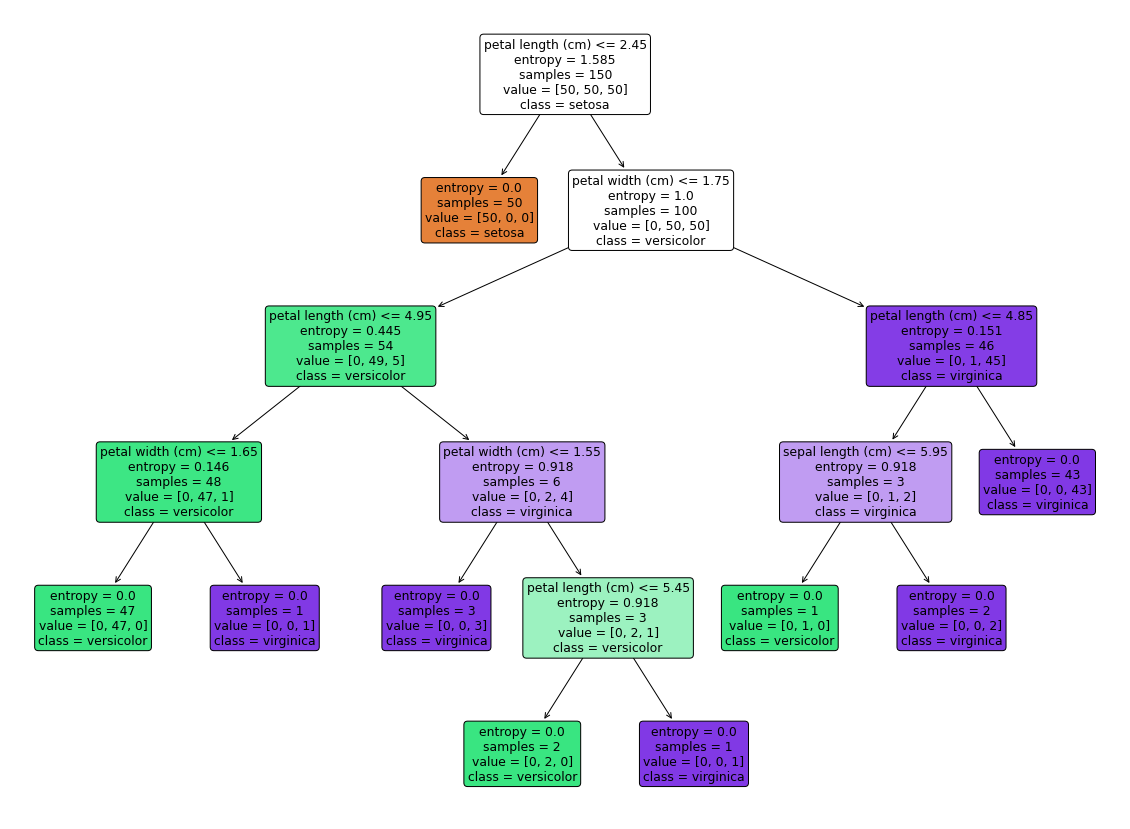

In [17]:
plt.figure(figsize=[20,15]) # width, height in inches
plot_tree(dtc, 
          feature_names=iris_data.feature_names,
          class_names=iris_data.target_names,
          filled=True, rounded=True)
plt.show()

## Exercício 1
Varie outros parâmetros da árvore de decisão (`max_depth`, `min_samples_split` e `min_samples_leaf`) e observe cada uma das árvores geradas.

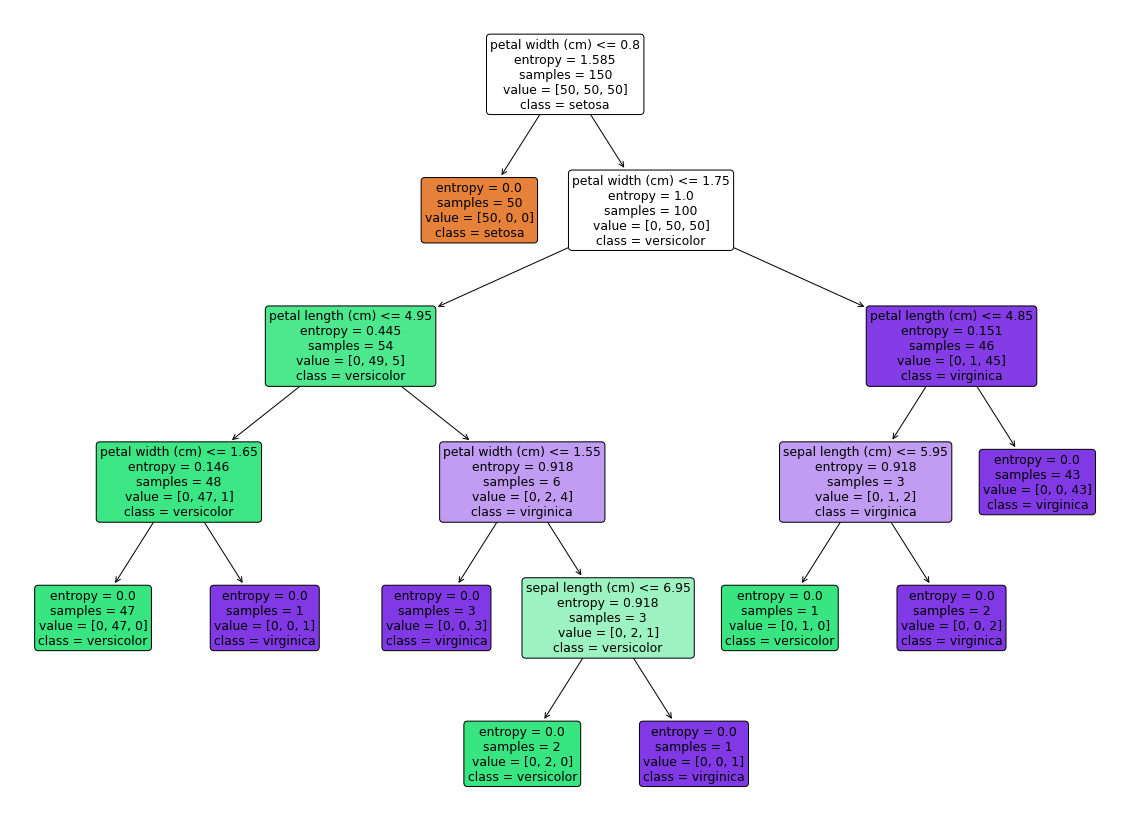

In [18]:
# Resolução do exercicio

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtc.fit(iris_data.data,iris_data.target)
plt.figure(figsize=[20,15]) # width, height in inches
plot_tree(dtc, 
          feature_names=iris_data.feature_names,
          class_names=iris_data.target_names,
          filled=True, rounded=True)
plt.show()

#### Visualização das fronteiras de decisão

Para percebermos como os dados são classificados por um modelo criado por uma árvore de decisão, vamos agora visualizar as fronteiras de decisão que a árvore cria. Como estamos a falar em visualização, teremos de simplificar o nosso problema e usar apenas duas dimensões (atributos) para visualizarmos as fronteiras. Vamos ainda simplificar o modelo, ou seja, vamos restringir o `max_depth` a 2 para simplificar a visualização.

Assim, consideremos os dois últimos atributos do conjunto de dados para visualizarmos as fronteiras. Analise com cuidado a árvore e as fronteiras desenhadas na figura da direita.

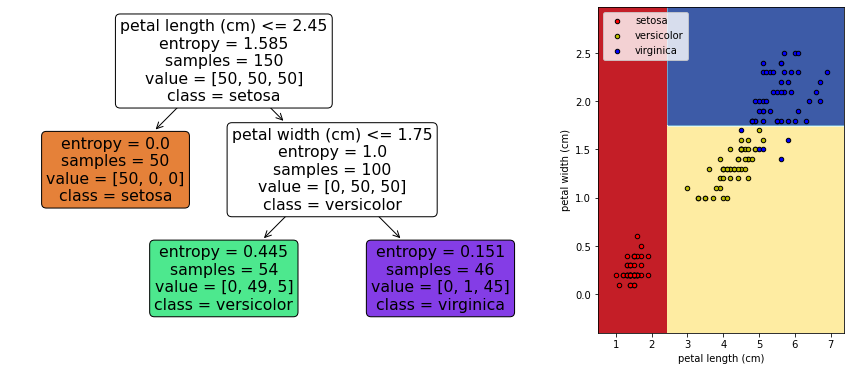

In [19]:
small_data = iris_data.data[:,[2,3]]
small_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=2)
small_tree.fit(small_data, iris_data.target)

plt.figure(figsize=[15,6])
plt.subplot(1,3,(1,2))
# mostrar a árvore de decisão
plot_tree(small_tree, 
          feature_names=iris_data.feature_names[2:],
          class_names=iris_data.target_names,
          filled=True, rounded=True)
plt.subplot(1,3,3)
# mostrar as fronteiras de decisão
plot_frontiers(small_data,
               iris_data.target,
               small_tree,
               iris_data.feature_names[2:],
               iris_data.target_names,
               nclasses=3,
               pcolors="ryb")
plt.show()

## Exercício 2

Altere o valor do parâmtero `max_depth` na árvore de decisão anterior e observe o que acontece às fronteiras de decisão.

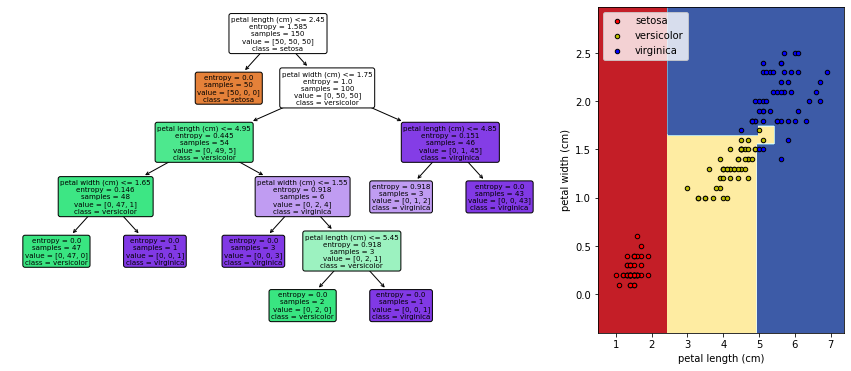

In [20]:
# Resolução do exercicio
small_data = iris_data.data[:,[2,3]]
small_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)
small_tree.fit(small_data, iris_data.target)

plt.figure(figsize=[15,6])
plt.subplot(1,3,(1,2))
# mostrar a árvore de decisão
plot_tree(small_tree, 
          feature_names=iris_data.feature_names[2:],
          class_names=iris_data.target_names,
          filled=True, rounded=True)
plt.subplot(1,3,3)
# mostrar as fronteiras de decisão
plot_frontiers(small_data,
               iris_data.target,
               small_tree,
               iris_data.feature_names[2:],
               iris_data.target_names,
               nclasses=3,
               pcolors="ryb")
plt.show()


#### Fazer previsões

Podemos agora usar o modelo treinado para fazer previsões para novos pontos, para os quais poderemos não conhecer a classe correspoondente.

Imagine que encontramos uma iris com comprimento e largura da sépala de 5 cm e 2.9 cm, respetivamente, e comprimento e largura da pétala de 1 cm e 0.2 cm, respetivamente. Que espécie de iris será esta?

Vamos primeiro criar o exemplo para depois o podermos classificar usando o modelo treinado. Esse exemplo terá de ser um array de arrays do módulo `numpy` (mesmo formato que o conjunto de dados explicado anteriormente.

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

Agora chamamos o método `predict` associado ao objeto instanciado da classe `DecisionTreeClassifier`.

In [22]:
p = dtc.predict(X_new)
p

array([0])

O nosso modelo previu que esta flor é da classe 0, ou seja, da classe Setosa

In [23]:
iris_data.target_names[p]

array(['setosa'], dtype='<U10')

Como sabemos se podemos confiar no modelo? Não sabemos a espécie correta deste exemplo, e não deveríamos saber, pois este é o objetivo de construir o modelo, mas podemos de alguma forma avaliar quão bom é o modelo, i.e., qual a probabilidade de como o modelo se comporta bem com dados inéditos? Para tal é necessário dividir o nosso conjunto de dados em conjuntos de treino e teste (iremos ver mais abaixo como fazer).

## K vizinhos mais próximos (k-NN)

O algoritmo dos ***k* vizinhos mais próximos** consiste em armazenar o conjunto de treino, e para classificar um novo ponto, o algoritmo encontra os vizinhos mais próximos no conjunto de treino. A versão mais simples deste algoritmo apenas considera um vizinho mais próximo (*k*=1), que é o vizinho mais próximo no conjunto de treino do ponto que pretendemos classificar. A classe desse ponto é simplesmente a classe do ponto de treino.

Em vez de considerarmos apenas o vizinho mais próximo, podemos considerar um número *k* de vizinhos, daí o nome do algoritmo. Quando se considera mais do que um vizinho, usa-se uma votação para atribuir a classe. Isto significa que, para cada ponto do conjunto de teste, conta-se quantos vizinhos são da classe 0, quantos são da classe 1, e por aí adiante. Depois atribui-se a classe mais frequente entre os vizinhos mais próximos.

Este algoritmo é implementado na classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">`KNeighborsClassifier`</a> no módulo `neighbors` (importado no início do guião). Esta classe tem vários argumentos que se podem escolher
```python
KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
```
no entanto, vamos apenas explicar os argumentos que iremos considerar neste guião:
* `n_neighbors` - o valor por defeito é 5; este parâmetro corresponde ao número de vizinhos a usar no algoritmo
* `n_jobs` - número de CPUs a usar durante a computação; se for 1 é usado apenas um CPU; se for 2 o processo é distribuído por 2 CPUs (se disponíveis no seu computador); se -1, então serão usados todos os CPUs disponíveis da sua máquina para fazer computação paralela

Semelhante à classe `DecisionTreeClassifier` existem métodos associados a esta classe:
* `fit(X,y)`- constrói (treina) uma árvore de decisão a partir dos dados `X` com as classes `y`
* `predict(X)` - prevê o valor da classe para os dados `X`
* `score(X,y)` - calcula a accuracy (*exatidão*) para um dado conjunto `X` e classes `y`

Vamos então aplicar o k-NN aos dados iris:

In [24]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(iris_data.data,iris_data.target)

KNeighborsClassifier(n_neighbors=1)

#### Fazer previsões

Tal como anteriormente, estamos em condições de prever a classe de um novo ponto. Dado o novo ponto que tinhamos anteriormente [5, 2.9, 1, 0.2], qual a classe deste ponto?

In [25]:
p = clf.predict(X_new)
iris_data.target_names[p]

array(['setosa'], dtype='<U10')

Este modelo também classificou este ponto como sendo da classe *Setosa*, mas tal como nas árvores de decisão, as mesmas questões colocam-se. Como podemos confiar neste modelo?

## Aprender um modelo usando conjunto de treino e teste

Para validar o modelo fornecemos novos dados (que não foram vistos pelo modelo) para os quais temos classes. Isto normalmente é feito dividindo o conjunto de dados (neste caso os 150 exemplos do conjunto iris) em duas partes. Uma parte dos dados, designada de **conjunto de treino**, é usada para treinar o nosso modelo, enquanto os restantes exemplos, formam o **conjunto de teste** e serão usados para verificar o quão bem o modelo funciona.

O scikit-learn tem uma função <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">`train_test_split`</a> que mistura (*shuffle*) o conjunto de dados e divide-o em duas partes. Esta função, por defeito, extrai 75% das linhas do conjunto de dados para o conjunto de treino, com as classes correspondentes. Os restantes 25% dos dados com as respetivas classes constituem o conjunto de teste. Estas percentagens podem ser ajustadas consoante o conjunto de dados que se tem, mas dividir 75%-25% é um boa regra de bolso (*rule of thumb*).

Esta função tem alguns argumentos úteis:
* os primeiros dois argumentos são sempre a matriz dos dados e o vector de classes
* `test_size` - por defeito usa o complemento do `train_size` ou 0.25 se `train_size` não for definido, e corresponde à percentagem de pontos a considerar no conjunto de teste
* `train_size` - por defeito usa o complemento do `test_size`, e corresponde à percentagem de pontos a considerar no conjunto de treino
* `random_state` - controla a aleatoriedade na escolha de pontos, se fixarmos a um valor inteiro qualquer, é possível replicar a mesma divisão dos dados e replicar resultados

e devolve quatro outputs, o conjunto de treino (designemo-lo por `X_train`) e de teste (`X_test`) que são matrizes (numpy arrays) com os dados e as classes de treino (`y_train`) e teste (`y_test`) que serão vectores (numpy array).

Vamos então dividir o nosso conjunto de dados

In [26]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=2)

In [27]:
X_train.shape

(112, 4)

In [28]:
X_test.shape

(38, 4)

Vamos agora treinar uma árvore de decisão usando apenas o conjunto de treino.

In [29]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

Podemos agora fazer previsões usando o conjunto de teste e comparar essas previsões com as classes verdadeiras (`y_test`), obtendo assim a exatidão (*accuracy*) do nosso modelo, que corresponde à fração de flores cuja espécie foi corretamente prevista ou classificada. 

Para obtermos a exatidão vamos usar o método `score` da classe `DecisionTreeClassifier`.

In [30]:
dtc.score(X_test, y_test)

0.9473684210526315

Para este modelo, a accuracy no conjunto de teste é de aproximadamente 0.947, o que significa que 94.7% das flores do conjunto de teste foram corretamente classificadas. Isto significa que é esperado que o nosso modelo esteja correto 94.7% das vezes a classificar novas flores.

Reparem ainda que no caso do conjunto de treino, a accuracy é de 100%. Geralmente a accuracy no conjunto de treino é mais elevada que no conjunto de teste, mas não de 100% na maioria dos problemas.

In [31]:
dtc.score(X_train, y_train)

1.0

## Exercicio 3

Varie os parâmetros das árvores de decisão e determine a exatidão nos conjuntos de treino e de teste de cada um dos modelos que criar.

In [32]:
# Resolução do exercicio

dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtc1.fit(X_train,y_train)
print(dtc1.score(X_test, y_test))
dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2, min_samples_leaf=1)
dtc2.fit(X_train,y_train)
print(dtc2.score(X_test, y_test))
dtc3 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=30, min_samples_leaf=1)
dtc3.fit(X_train,y_train)
print(dtc3.score(X_test, y_test))
dtc4 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=40)
dtc4.fit(X_train,y_train)
print(dtc4.score(X_test, y_test))

0.9473684210526315
0.9736842105263158
0.9736842105263158
0.7105263157894737


## Exercicio 4

Use o k-NN, com k=1 e valide o modelo calculando a exatidão nos conjuntos de treino e de teste. O que observa? Pode confiar nestes resultados ou terá sido um acaso?

In [33]:
# Resolução do exercicio
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

1.0

## O problema do Overfitting (sobreajuste)

Vamos agora supor que estamos à procura dos melhores parâmetros para criar o nosso modelo. Isto significa que vamos variando um ou dois parâmetros gerando diferentes modelos, treinamos cada um desses modelos no conjunto de treino e validamos no conjunto de teste.

Para exemplificar, vamos variar apenas o `min_samples_split` (entre 2 e 10) nas árvores de decisão, que corresponde ao número mínimo de pontos num nó para dividir esse nó. Este parâmetro tem o valor inicial de 2, i.e., as árvores são construídas até encontrar uma classe, mesmo que as folhas fiquem com apenas um ponto. 

Vamos então criar esses modelos e calcular a exatidão dos conjuntos de treino e de teste. Para se perceber melhor o que está a acontecer, vamos construir um gráfico com esses valores de exatidão.

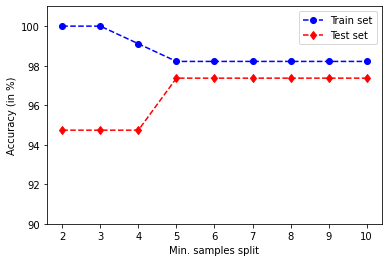

In [34]:
train = []
test = []
for i in range(2,11):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_split=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(2,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(90,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples split') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

Reparem que no conjunto de treino o valor do accuracy é de 100% quando o parâmetro considerado tem valor de 2 ou 3, isto significa que a árvore foi ajustada demasiado ao conjunto de treino (existindo nós com apenas um ponto) e não consegue generalizar muito bem para o conjunto de teste, tendo uma accuracy de aproximadamente 94.7%. Mas quando aumentamos o valor do parâmetro o valor da accuracy no conjunto de treino começa a diminuir (~ 98.2%) e a do conjunto de teste aumenta (~ 97.4%), a partir de certo ponto atinge um patamar, sugerindo a existência de **overfit** nos dados quando se usa um valor muito baixo deste parâmetro, fazendo com que o modelo não generalize muito bem para pontos não vistos.

Atenção que se aumentarmos demasiado o valor do parâmetro (p.ex., `min_samples_split=42`), o modelo deixa de conseguir aprender porque não captou a informação necessária do conjunto de dados para generalizar corretamente para exemplos que nunca viu. O que significa que a accuracy no conjunto de treino diminui (~ 96.4%), mas a do conjunto de teste também diminui (~ 94.7%). Neste caso, temos um **underfit** aos dados.

Resumindo, **overfit** ocorre quando ajustamos um modelo às particularidades do conjunto de treino, tornando o modelo demasiado complexo e a funcionar muito bem no conjunto de treino, mas não é capaz de generalizar para novos dados. Por outro lado, **underfit** ocorre se o modelo for demasiado simples, não sendo possível captar todos os aspectos e variabilidades dos dados, levando a que o desempenho do classificador seja mau, mesmo no conjunto de treino.

## Exercicio 5

Experimente fazer um estudo semelhante com outro parâmetro da árvore de decisão, por exemplo, varie o parâmetro `min_samples_leaf` e verifique o que acontece à exatidão nos conjuntos de treino e teste.

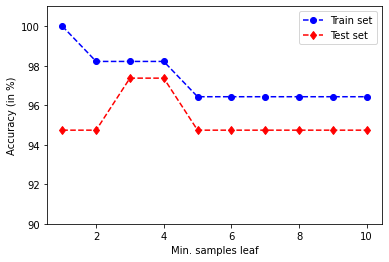

In [35]:
# Resolução do exercicio 3

train = []
test = []
for i in range(1,11):
    ad = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
    ad = ad.fit(X_train,y_train)
    train.append(ad.score(X_train,y_train)*100)
    test.append(ad.score(X_test,y_test)*100)

# fazer um gráfico com a accuracy
x = np.arange(1,11,1) # intervalo do eixo dos xx's
plt.plot(x, train, 'bo--', label='Train set')
plt.plot(x, test, 'rd--', label='Test set')
plt.ylim(90,101) # limite dos eixo dos yy's
plt.xlabel('Min. samples leaf') # legenda do eixo dos xx's
plt.ylabel('Accuracy (in %)') # legenda do eixo dos yy's
plt.legend() # legenda
plt.show()

Repare que o nosso modelo é obtido a partir de um conjunto de treino e estamos a verificar a exatidão num único conjunto de teste, que foram obtidos anteriormente. Ambos os conjuntos de dados foram escolhidos aleatoriamente a partir dos dados originais. Para o modelo base das árvores de decisão (sem mexer nos parâmetros) estamos com uma exatidão de 100% para o conjunto de treino e 94.7% para o conjunto de teste. No caso dos vizinhos mais próximos, quando k=1, estamos com 100% em ambos os conjuntos de treino e teste (ver exercicio 4). Será que podemos confiar nos resultados que estamos a obter? O que acontece se fizermos outra partição diferente? 

Vamos experimentar fazer uma partição diferente dos dados (alterando o valor do `random_state` na função `train_test_split`) e treinar novamente os modelos (árvores de decisão e k-NN, k=1). 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    random_state=9)
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print('Árvore de decisão:')
print('Accuracy train:', dtc.score(X_train,y_train))
print('Accuracy test:', dtc.score(X_test,y_test))
print()

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
print('k-NN, k=1:')
print('Accuracy train:', clf.score(X_train,y_train))
print('Accuracy test:', clf.score(X_test,y_test))

Árvore de decisão:
Accuracy train: 1.0
Accuracy test: 0.9736842105263158

k-NN, k=1:
Accuracy train: 1.0
Accuracy test: 1.0


Reparem que ao criarmos uma partição diferente do nosso conjunto de dados, a exatidão do conjunto de teste é mais baixa comparando com os resultados da partição que tinhamos anteriormente. Experimentem variar o valor do `random_state` na função `train_test_split`.

## Cross-validation

Para avaliarmos a performance do nosso modelo iremos recorrer a uma técnica mais robusta, designada por validação cruzada, ***cross-validation***, que consiste numa simples divisão do conjunto de dados em dois sub-conjuntos, um de treino e um de teste. No **k-fold cross-validation** os dados são divididos múltiplas vezes e múltiplos modelos são treinados. *k* é um número especificado pelo utilizador, normalmente 5 ou 10, correspondente ao número de subconjuntos obtidos. 

No k-fold cross-validation, dividimos aleatoriamente o conjunto de dados em k folds (subconjuntos) independentes, onde k-1 são usados para treinar o modelo e um subconjunto (fold) é usado para testar o modelo. Este processo é repetido k vezes, obtendo k modelos e valores de exatidão para cada um.

<img src="cross_validation.png" width="400">

Assim, será necessário criar *k* partições do conjunto de dados, treinar um modelo para cada uma das partições e calcular a accuracy para cada um dos modelos. Só depois poderemos calcular o valor médio da accuracy dos *k* subconjuntos independentes criados para obter uma estimação, do desempenho, mais robusta e menos sensível à partição do conjunto de dados. 

Não teremos de implementar isto à mão, o scikit-learn tem uma função, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">`cross_val_score`</a>, que faz isto tudo por nós. A função `cross_val_score` tem os seguintes argumentos (apenas explicaremos o mais relevantes para este guião):
```python
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
* `estimator` - o objeto com o modelo que se quer ajustar, neste caso será um objeto da classe `DecisionTreeClassifier` ou `KNeighborsClassifier`
* `X` - conjunto de dados a ser dividido
* `y` - classes correspondentes ao `X`
* `cv` - número de folds (subconjuntos) para dividir os dados
* `n_jobs` - tal como na função `KNeighborsClassifier`, pode-se escolher o número de CPUs para paralelizar o processo

Vamos criar o nosso modelo de árvore de decisão e fazer cross-validation sobre os dados originais.

In [37]:
dtc = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc,
                         X=iris_data.data,
                         y=iris_data.target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	1.0
	0.9333333333333333
	1.0
	0.9333333333333333
	0.9333333333333333
	0.8666666666666667
	0.9333333333333333
	0.9333333333333333
	1.0
	1.0
Average CV accuracy: 0.953 +/- 0.043


Resumindo, podemos concluir que é esperado que o nosso modelo esteja correto em média 96% das vezes. Olhando para cada um dos valores de accuracy das 10-folds, podemos concluir que existe alguma varição na exatidão entre folds, variando entre um caso de 86.6% e vários de 100%. Isto pode significar que o modelo é muito dependente de uma divisão em particular do conjunto de dados usado para treino, mas também pode ser simplesmente **consequência do conjunto de dados ser pequeno**.

Mas as árvores de decisão têm outros parâmetros que se podem variar, como por exemplo, `max_depth`ou `min_samples_split`. Como escolher o melhor parâmetro para o nosso conjunto de dados, i.e., qual o melhor modelo? A escolha do melhor modelo é feita usando cross-validation para evitar overfit ao conjunto de treino.

## Exercicio 6

Varie outros parâmetros das árvores de decisão e conclua qual o melhor modelo para o conjunto de dados iris.

In [38]:
# resolução do exercicio
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=6, min_samples_leaf=1)
scores = cross_val_score(dtc,
                         X=iris_data.data,
                         y=iris_data.target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	1.0
	0.9333333333333333
	1.0
	0.9333333333333333
	0.9333333333333333
	0.9333333333333333
	0.9333333333333333
	0.9333333333333333
	1.0
	1.0
Average CV accuracy: 0.960 +/- 0.033


## Exercicio 7

Aplique o cross-validation ao k-NN, com k=1.

In [39]:
# Resolução do exercicio

clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf,
                         X=iris_data.data,
                         y=iris_data.target,
                         cv=10,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	1.0
	0.9333333333333333
	1.0
	0.9333333333333333
	0.8666666666666667
	1.0
	0.8666666666666667
	1.0
	1.0
	1.0
Average CV accuracy: 0.960 +/- 0.053


Como escolher o melhor valor de *k* para o número de vizinhos? A escolha do *k* é muito dependente dos dados e idealmente *k* escolhe-se como sendo um inteiro ímpar para evitar empates na votação entre vizinhos. Se existirem empates o algoritmo escolhe aleatoriamente a classe que irá atributir ao novo ponto. Além disso, usa-se o cross-validation para escolher o valor de *k* de forma a evitar overfit ao conjunto de dados.

## Exercicio 8
Varie o valor de *k* e aplicando cross-validation, conclua qual o melhor valor para o conjunto de dados iris.

In [40]:
# Resolução do exercicio 
for i in range(1,40,2):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf,
                             X=iris_data.data,
                             y=iris_data.target,
                             cv=10,
                             n_jobs=-1
                            )
    #print('CV accuracy:', *scores, sep='\n\t')
    print(str(i) + ' Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

1 Average CV accuracy: 0.960 +/- 0.053
3 Average CV accuracy: 0.967 +/- 0.045
5 Average CV accuracy: 0.967 +/- 0.045
7 Average CV accuracy: 0.967 +/- 0.045
9 Average CV accuracy: 0.973 +/- 0.033
11 Average CV accuracy: 0.967 +/- 0.045
13 Average CV accuracy: 0.980 +/- 0.031
15 Average CV accuracy: 0.973 +/- 0.033
17 Average CV accuracy: 0.973 +/- 0.033
19 Average CV accuracy: 0.973 +/- 0.033
21 Average CV accuracy: 0.967 +/- 0.033
23 Average CV accuracy: 0.973 +/- 0.033
25 Average CV accuracy: 0.967 +/- 0.033
27 Average CV accuracy: 0.967 +/- 0.045
29 Average CV accuracy: 0.953 +/- 0.043
31 Average CV accuracy: 0.947 +/- 0.050
33 Average CV accuracy: 0.947 +/- 0.050
35 Average CV accuracy: 0.947 +/- 0.050
37 Average CV accuracy: 0.947 +/- 0.050
39 Average CV accuracy: 0.953 +/- 0.043


## Árvores de decisão para atributos categóricos

Até agora o nosso conjunto de dados tinha apenas atributos numéricos (valores reais). Mas em muitos problemas pode não ser o caso, e alguns ou mesmo todos os atributos são categóricos. Podemos ter atributos categóricos com apenas dois valores possiveis, que serão convertidos num valor inteiro 0 ou 1. Mas também podemos ter atributos categóricos com mais do que dois valores, em que cada valor será codificado num atributo distinto, usando **codificação one-hot**. O scikit-learn trabalha com atributos numéricos, mas fornece mecanismos para converter atributos categóricos em numérico. O que apresentamos a seguir serve não só para as árvores de decisão mas também para o k-NN.

Vamos ver como transformar um conjunto de dados com atributos categóricos para treinarmos uma árvore de decisão. Para tal usamos um pequeno conjunto de dados *votingIssue.csv*, que iremos lê-lo com a função `load_data`.

In [41]:
data, target, feature_names, target_names = load_data('votingIssue.csv')

In [42]:
feature_names

array(['Person', 'Education', 'MaritalStatus', 'Sex', 'HasChildren'],
      dtype=object)

Olhemos para os dados (vamos apenas mostrar as primeiras linhas) para percebermos o tipo de atributos que temos e quais necessitamos de transformar. 

In [43]:
data[:5]

array([[1, 'Primary', 'Single', 'Male', 'No'],
       [2, 'Primary', 'Single', 'Male', 'Yes'],
       [3, 'Primary', 'Married', 'Male', 'No'],
       [4, 'University', 'Divorced', 'Female', 'No'],
       [5, 'University', 'Married', 'Female', 'Yes']], dtype=object)

A primeira coluna corresponde a um identificador dos sujeitos, não é relevante para os modelos e teremos de a remover, os restantes atributos são categóricos: o atributo *Education* tem três valores (Primary, Secundary, University), o atributo *MaritalStatus* também tem três valores (Single, Married, Divorced), os atributos *Sex* e *HasChildren* têm ambos dois valores (Male/Female e Yes/No, respetivamente).

Comecemos então por remover a primeira coluna dos dados e do vector com o nome dos atributos.

In [44]:
data = data[:,1:]
data[:5]

array([['Primary', 'Single', 'Male', 'No'],
       ['Primary', 'Single', 'Male', 'Yes'],
       ['Primary', 'Married', 'Male', 'No'],
       ['University', 'Divorced', 'Female', 'No'],
       ['University', 'Married', 'Female', 'Yes']], dtype=object)

In [45]:
feature_names = feature_names[1:]
feature_names

array(['Education', 'MaritalStatus', 'Sex', 'HasChildren'], dtype=object)

No módulo fornecido com este guião existem funções que convertem estes atributos categóricos em atributos numéricos. A função `encode_feature` recebe um array a 1 dimensão (i.e., com um atributo categórico) e converte-o para numérico. Finalmente, a função `one_hot_encode_feature` recebe os dados completos, o número da coluna que se pretende codificar e o vector com o nome dos atributos, e apaga essa coluna e adiciona no fim dos dados o número de colunas correspondentes ao número de categorias existentes nesse atributo categórico. Além disso, atualiza o vector com o nome dos atributos. Essas colunas estão codificadas com 0 e 1. Todas estas funções são baseadas nas funções <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=onehotencoder#sklearn.preprocessing.OneHotEncoder">`OneHotEncoder`</a> e <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=labelencoder#sklearn.preprocessing.LabelEncoder">`LabelEncoder`</a> do scikit-learn.

Vamos então codificar os atributos *Sex* e *HasChildren* que têm apenas duas categorias cada, usando a função `encode_feature`.

In [46]:
data

array([['Primary', 'Single', 'Male', 'No'],
       ['Primary', 'Single', 'Male', 'Yes'],
       ['Primary', 'Married', 'Male', 'No'],
       ['University', 'Divorced', 'Female', 'No'],
       ['University', 'Married', 'Female', 'Yes'],
       ['Secondary', 'Single', 'Male', 'No'],
       ['University', 'Single', 'Female', 'No'],
       ['Secondary', 'Divorced', 'Female', 'No'],
       ['Secondary', 'Single', 'Female', 'Yes'],
       ['Secondary', 'Married', 'Male', 'Yes'],
       ['Primary', 'Married', 'Female', 'No'],
       ['Secondary', 'Divorced', 'Male', 'Yes'],
       ['University', 'Divorced', 'Female', 'Yes'],
       ['Secondary', 'Divorced', 'Male', 'No']], dtype=object)

In [47]:
# codificar atributo sex
data[:,2] = encode_feature(data[:,2]) 
# codificar atributo HasChildren
data[:,3] = encode_feature(data[:,3]) 
data[:5]

array([['Primary', 'Single', 1.0, 0.0],
       ['Primary', 'Single', 1.0, 1.0],
       ['Primary', 'Married', 1.0, 0.0],
       ['University', 'Divorced', 0.0, 0.0],
       ['University', 'Married', 0.0, 1.0]], dtype=object)

Codifiquemos agora o atributo *Education* com a função `one_hot_encode_feature`. Ao usar esta função, a primeira coluna relativa a este atributo é apagada e serão adicionadas 3 colunas no fim dos dados que correspondem a Primary, Secondary, University. 

In [48]:
data, feature_names = one_hot_encode_feature(data, 0, feature_names)

In [49]:
data[:5]

array([['Single', 1.0, 0.0, 1.0, 0.0, 0.0],
       ['Single', 1.0, 1.0, 1.0, 0.0, 0.0],
       ['Married', 1.0, 0.0, 1.0, 0.0, 0.0],
       ['Divorced', 0.0, 0.0, 0.0, 0.0, 1.0],
       ['Married', 0.0, 1.0, 0.0, 0.0, 1.0]], dtype=object)

In [50]:
feature_names

array(['MaritalStatus', 'Sex', 'HasChildren', 'Primary', 'Secondary',
       'University'], dtype=object)

Finalmente, codifiquemos o atributo *MaritalStatus*.

In [51]:
data, feature_names = one_hot_encode_feature(data, 0, feature_names)
print(data[:5])
print(feature_names)

[[1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0]
 [1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0]
 [1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0]
 [0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0]
 [0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0]]
['Sex' 'HasChildren' 'Primary' 'Secondary' 'University' 'Divorced'
 'Married' 'Single']


Neste momento, todos os atributos são numéricos e portanto estamos em condições de criarmos um modelo com árvores de decisão.

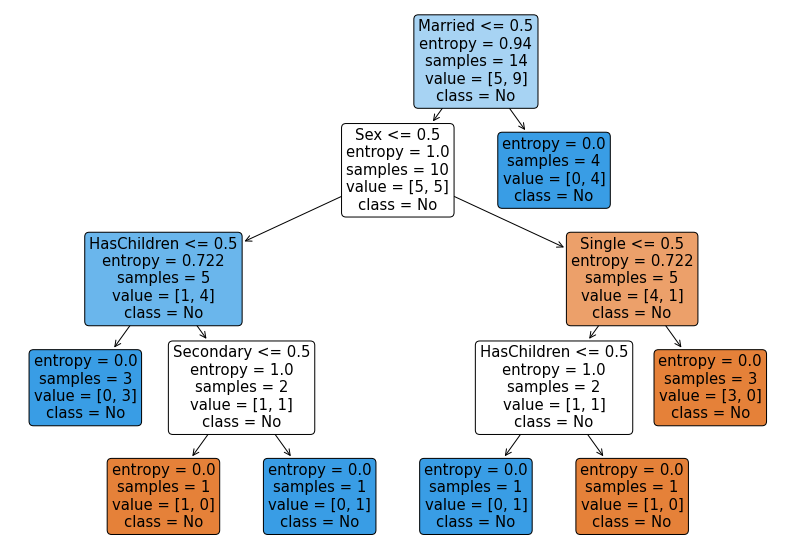

In [52]:
cdt = DecisionTreeClassifier(criterion='entropy')
cdt.fit(data, target)
plt.figure(figsize=[14,10])
plot_tree(cdt,
          feature_names=feature_names,
          class_names=target,
          filled=True, rounded=True)
plt.show()

## Exercicio 9

Avalie o desempenho do modelo anterior com cross-validation. Atenção que este conjunto de dados é muito pequeno (tem apenas 14 exemplos), por isso use um 3-fold no cross-validation, isto significa, que 5 exemplos são para teste e os restantes para treino. Tendo tão poucos dados para treino, não é de esperar uma exatidão muito alta e se correr várias vezes deve notar variações significativas.

In [53]:
# resolução do exercicio
scores = cross_val_score(cdt,
                         X=data,
                         y=feature_names,
                         cv=3,
                         n_jobs=-1
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [14, 8]

## Árvores de decisão com atributos mistos 

Muitos problemas possuem conjuntos de dados com atributos mistos, i.e., atributos numéricos e categóricos. Vamos então demonstrar como treinar uma árvore de decisão nesta situação. 

Consideremos que queremos prever se um cliente irá comprar um barco, dado os registos de clientes anteriores que compraram ou não compraram um barco. O objetivo é enviar emails promocionais a potenciais clientes, mas não incomodar clientes que não estão interessados.

Primeiro temos de carregar os dados e olhar para os dados para percebermos o tipo de cada um dos atributos.

In [ ]:
data, target, feature_names, target_names = load_data('customers.csv')

In [ ]:
feature_names

In [ ]:
data[:5]

Reparem que os atributos *Age*, *NumberCarsOwned* e *NumberChildren* são numéricos, e *OwnsHouse*, *MaritalStatus* e *OwnsDog* são categóricos. Assim é necessário transformar estes atributos categóricos. Além disso, *OwnsHouse* e *OwnsDog* têm apenas duas categorias, enquanto *MaritalStatus* tem quatro categorias.

In [ ]:
# codificar OwnsHouse
data[:,2] = encode_feature(data[:,2])
# codificar OwsDog
data[:,5] = encode_feature(data[:,5])
# codificar MaritalStatus
data, feature_names = one_hot_encode_feature(data,4,feature_names)
print(feature_names)
print(data[:5])

## Exercicio 10

O conjunto de dados *customers.csv* está preparado para se treinar uma árvore de decisão. Treine uma árvore de decisão (sem alterar os parâmetros, apenas use o critério "entropy") e visualize-a.

In [ ]:
# Resolução do exercicio
